# Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Linear regression using the Normal Equation

*Linear regression*

$$\hat{y} = mx + b$$

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [13]:
X.shape

(100, 1)

In [14]:
y.shape

(100, 1)

To find the value of 𝜃 that minimizes the cost function, there is a closed-form solution -in other words, a mathematical equation that gives the result directly. This is called normal equation.

$Normal Equation$

$$ m =(X^TX)^{-1} X^Ty $$

In [18]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [19]:
theta_best

array([[4.10358119],
       [2.89445397]])

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10358119]), array([[2.89445397]]))

* intercept_ : bias
* coef_ : weights

## Batch gradient descent

The idea behind gradient descent is simple - by gradually tuning parameters, such as slope (m) and the intercept (b) in our regression function y = mx + b, we minimize cost. By cost, we usually mean some kind of a function that tells us how far off our model predicted result. For regression problems we often use mean squared error (MSE) cost function. If we use gradient descent for the classification problem, we will have a different set of parameters to tune.

$$ MSE = \frac{2}{m}\sum_{i=1}^{m} (\hat{y_i} - y_i)^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$

Instead of computing these partial derivatives individually, you can use this equation to compute them all in one go.

$$ m =\frac{2}{m}X^T(X𝜃-y) $$

In [99]:
learning_rate = 0.01
n_iterations = 1000
m = 100
theta_path_bgd = []

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    theta_path_bgd.append(theta)

In [100]:
theta

array([[4.04097005],
       [2.94766129]])

## Stochastic Gradient Descent

Stochastic Gradient Descent works almost the same as Gradient Descent (also called Batch Gradient Descent), but instead of training on entire dataset, it picks only one sample to update m and b parameters, which makes it much faster. 

In [101]:
theta_path_sgd = []
m = len(X_b)

In [102]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)

In [103]:
theta

array([[4.16054709],
       [2.88248809]])

In [104]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [105]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16191215]), array([2.94909142]))

## Mini-batch gradient descent

Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from bhardware optimization of matrix operations, especially when using GPUs.

In [106]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2, 1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(t)
        theta = theta - learning_rate * gradients
        theta_path_mgd.append(theta)

In [107]:
theta

array([[4.1181443 ],
       [2.90035937]])

In [108]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

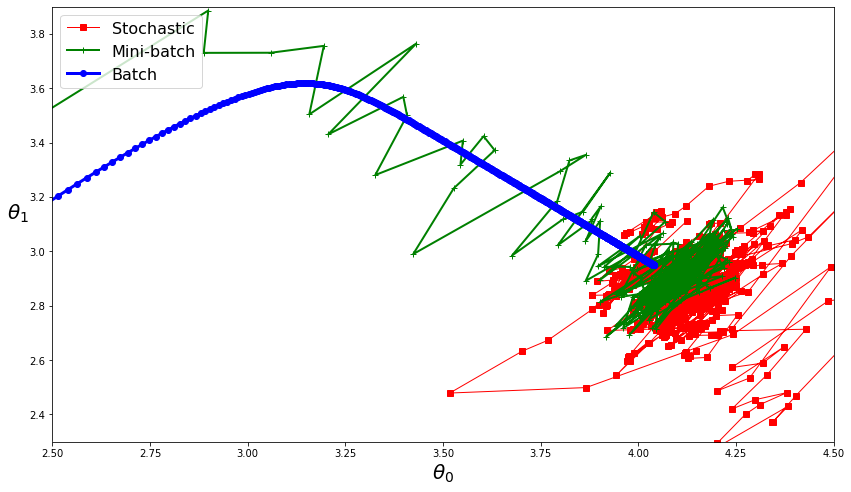

In [109]:
plt.figure(figsize=(14,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## Type of gradient descent

There are three popular types of gradient descent that mainly differ in the amount of data they use: 

#### BATCH GRADIENT DESCENT

Batch gradient descent, also called vanilla gradient descent, calculates the error for each example within the training dataset, but only after all training examples have been evaluated does the model get updated. This whole process is like a cycle and it's called a training epoch.

Some advantages of batch gradient descent are its computational efficient, it produces a stable error gradient and a stable convergence. Some disadvantages are the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires the entire training dataset be in memory and available to the algorithm.

#### STOCHASTIC GRADIENT DESCENT

By contrast, stochastic gradient descent (SGD) does this for each training example within the dataset, meaning it updates the parameters for each training example one by one. Depending on the problem, this can make SGD faster than batch gradient descent. One advantage is the frequent updates allow us to have a pretty detailed rate of improvement.

The frequent updates, however, are more computationally expensive than the batch gradient descent approach. Additionally, the frequency of those updates can result in noisy gradients, which may cause the error rate to jump around instead of slowly decreasing.

#### MINI-BATCH GRADIENT DESCENT

Mini-batch gradient descent is the go-to method since it’s a combination of the concepts of SGD and batch gradient descent. It simply splits the training dataset into small batches and performs an update for each of those batches. This creates a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent.

Common mini-batch sizes range between 50 and 256, but like any other machine learning technique, there is no clear rule because it varies for different applications. This is the go-to algorithm when training a neural network and it is the most common type of gradient descent within deep learning.